<a href="https://colab.research.google.com/github/Shashankabasani/ANTICIPATING-POTENTIAL-ILLNESS-THROUGH-PREDICTIVE-MODELS/blob/main/ANTICIPATING_POTENTIAL_ILLNESS_THROUGH_PREDICTIVE_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disease Prediction from Medical Data ML

Create a model to predict the likelihood of a disease based on medical data (e.g., symptoms, patient history). Use datasets with labeled medical records and apply classification algorithms

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.model_selection import KFold, cross_val_score
from statistics import mode

%matplotlib inline

# Load the dataset

In [ ]:
df = pd.read_csv('/content/Training.csv')


# Explore the dataset

show first 5 records of training dataset

In [ ]:
df.head()

show first 5 records of test dataset

In [ ]:
df.columns

Display descriptive statistics of numerical columns

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
import pandas as pd

# Assuming dftrain is your DataFrame
# Reset the index to synchronize it with the actual columns
df.reset_index(drop=True, inplace=True)

# Check for missing values after resetting index
missing_values = df.isnull().sum()

# Print the missing values
print(missing_values)


In [ ]:
df.isnull().sum()

**DROPING UNNAMED **

In [ ]:
# get num missing values per column
missing_vals = df.isna().sum()
# show only for columns where some values are missing
missing_vals[missing_vals.gt(0)]

In [ ]:
import pandas as pd

# Assuming dftrain is your DataFrame
# Replace 'dftrain' with your actual DataFrame name

# Check for columns without names
empty_columns = [col for col in df.columns if not col.strip()]

if empty_columns:
    print("Columns without names:")
    for col in empty_columns:
      print(col)
else:
  print("All columns have names in the DataFrame.")


# Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predicted labels
true_labels = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1])
predicted_labels = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
df.info()

identify null values

In [ ]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

**Unnamed: 133** is noticed to have all null values. It is dropped as it is a redundant attribute with missing values for all records.

In [ ]:
# drop 'Unnamed: 133'
df.drop('Unnamed: 133', axis=1, inplace=True)
df.info()

In [ ]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

This shows that there are no missing values in the training dataset.

We checked the test dataset and found no missing values. After that, we looked for errors like different numerical formats and data types by analyzing bar plots.

In [ ]:
#colors = ['#9c3dbf', '#812929']
#columns = list(dftrain.columns)
# barplot of the count for all symptoms' absence and presence
#for i in columns :
   # fig, ax = plt.subplots(figsize=(2,2))
   # bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
   # plt.xticks(rotation=0)
   # fig.suptitle("Count of Symptom \"" + i + "\"")

<ipython-input-20-3ad544eb7acb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=colors, ax=axs[i])
<ipython-input-20-3ad544eb7acb>:19: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=column, data=df, palette=colors, ax=axs[i])
<ipython-input-20-3ad544eb7acb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=colors, ax=axs[i])
<ipython-input-20-3ad544eb7acb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

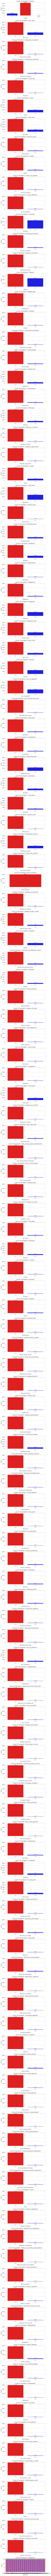

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dftrain is your DataFrame
columns = list(df.columns)

# Set a Seaborn style
sns.set(style="whitegrid")

# Define colors
colors = ['red', 'blue']

# Create subplots
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 3 * len(columns)))

# Iterate through each column
for i, column in enumerate(columns):
    # Plot the count for each symptom
    sns.countplot(x=column, data=df, palette=colors, ax=axs[i])

    # Add labels and title
    axs[i].set_title("Count of Symptom \"" + column + "\"", fontsize=14)
    axs[i].set_xlabel(column, fontsize=12)
    axs[i].set_ylabel("Count", fontsize=12)

    # Add percentage labels on top of bars
    total = len(df[column])
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{height/total:.1%}', ha="center", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


all symptoms, sorted alphabetically

In [ ]:
sorted(df.prognosis.unique())

TypeError: '<' not supported between instances of 'float' and 'str'

detect duplicated records

In [ ]:
df[df.duplicated(subset = None, keep = False)]

 display the number of entries, the number and names of the column attributes, the data type and
   

In [ ]:
df.info()

# Exploratory Data Analysis

list and count the target class label names and their frequency

In [ ]:
from collections import Counter
count = Counter(df['prognosis'])
count.items()

Count of each target class label

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'prognosis' is a categorical column, convert it to categorical data type
df['prognosis'] = df['prognosis'].astype('category')

# count of each target class label
plt.figure(figsize=(30, 5))
ax = sns.countplot(data=df, x='prognosis', palette='PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


**Moving on to analyse the individual qualitative attributes of the 132 symptoms :**

In [ ]:
# list of all symptoms
columns = list(df.columns)
columns


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'columns' is a list of column names in your dataframe

colors = ['red', 'green']

# Set Seaborn style
sns.set(style="whitegrid")

# Iterate through each column
for i in columns:
    # Create a bar plot using Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=i, data=df, palette=colors)

    # Customize plot labels and title
    ax.set_xlabel(f"{i} Absence/Presence", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"Count of Symptom \"{i}\"", fontsize=16)

    # Show plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming `columns` is a list of symptom names

colors = ['#fffb08', '#fb08ff']  # Red and Green colors
# barplot of the count for all symptoms' absence and presence
for i in columns:
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize for better visibility
    bar = df.groupby(i).size().plot(kind='bar', color=colors, ax=ax)

    # Customizing plot appearance
    plt.xticks(rotation=0)
    plt.title("Count of Symptom \"" + i + "\"", fontsize=16)
    plt.xlabel("Presence of Symptom", fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Customizing legend
    plt.legend(labels=['Absent', 'Present'], loc='upper right')

    # Adding data labels
    for p in bar.patches:
        plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    plt.show()


 summary statistics of the attributes, including measures of central tendency and measures of dispersion

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90, 50))

category_counts = df['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=16, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=50)
plt.axis('equal')

plt.show()

**LABEL ENCODING FOR TARGET VARIABLE**

In [ ]:
encoder=LabelEncoder()
df['prognosis']=encoder.fit_transform(df['prognosis'])
df